#### COVID-19 Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopy
import math

import sklearn as sk

In [2]:
full_data = pd.read_csv("../data/full_data_mar_17.csv")
full_data = full_data.fillna(0)
full_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


#### Filter Data for Sri Lanka

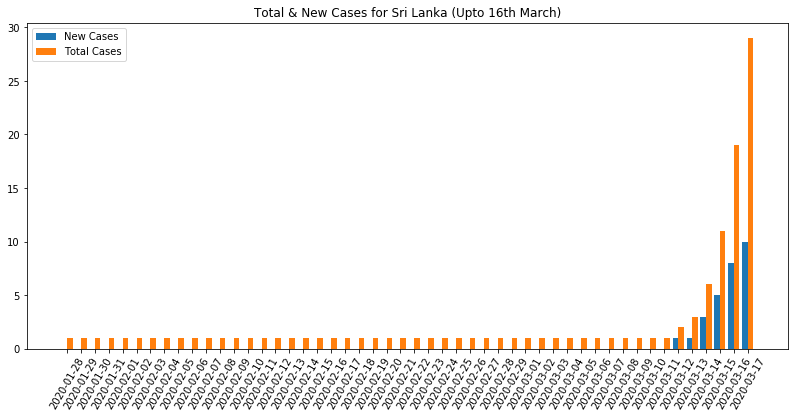

In [3]:
sl_data = full_data[full_data['location'] == "Sri Lanka"]
f = plt.figure(figsize=(30,6))
ax = f.add_subplot(121)
plt.xticks(rotation=60)
width = 0.4
x_ind = np.arange(len(sl_data['date']))
ax.set_xticks(x_ind + width / 2)
ax.set_xticklabels(sl_data['date'])
ax.set_title("Total & New Cases for Sri Lanka (Upto 16th March)")
ax.bar(x_ind, 'new_cases', width, data = sl_data, label = "New Cases")
ax.bar(x_ind + width, 'total_cases', width, data = sl_data, label = "Total Cases")
ax.legend()
plt.show()

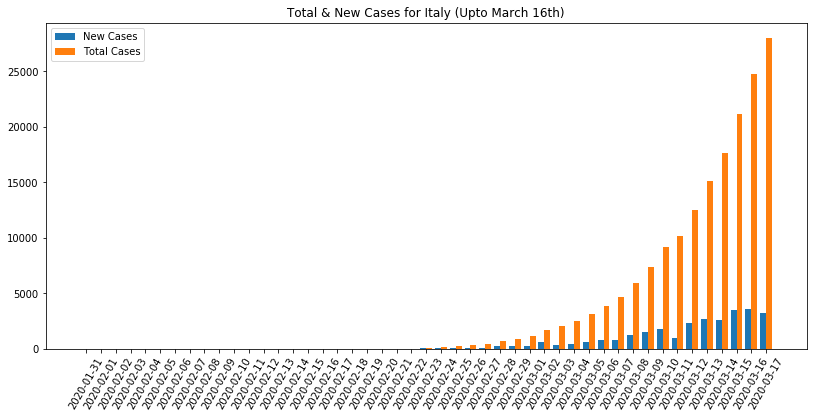

In [4]:
italy_data = full_data[full_data['location'] == "Italy"]
f = plt.figure(figsize=(30,6))
ax = f.add_subplot(121)
plt.xticks(rotation=60)
width = 0.4
x_ind = np.arange(len(italy_data['date']))
ax.set_xticks(x_ind + width / 2)
ax.set_xticklabels(italy_data['date'])
ax.set_title("Total & New Cases for Italy (Upto March 16th)")

ax.bar(x_ind, 'new_cases', width, data = italy_data, label = "New Cases")
ax.bar(x_ind + width, 'total_cases', width, data = italy_data, label = "Total Cases")
ax.legend()
plt.show()

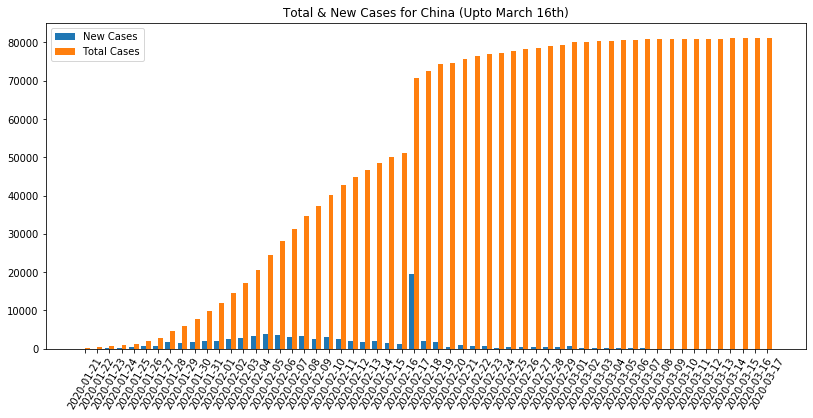

In [5]:
china_data = full_data[full_data['location'] == "China"]
f = plt.figure(figsize=(30,6))
ax = f.add_subplot(121)
plt.xticks(rotation=60)
width = 0.4
x_ind = np.arange(len(china_data['date']))
ax.set_xticks(x_ind + width / 2)
ax.set_xticklabels(china_data['date'])
ax.set_title("Total & New Cases for China (Upto March 16th)")

ax.bar(x_ind, 'new_cases', width, data = china_data, label = "New Cases")
ax.bar(x_ind + width, 'total_cases', width, data = china_data, label = "Total Cases")
ax.legend()
plt.show()

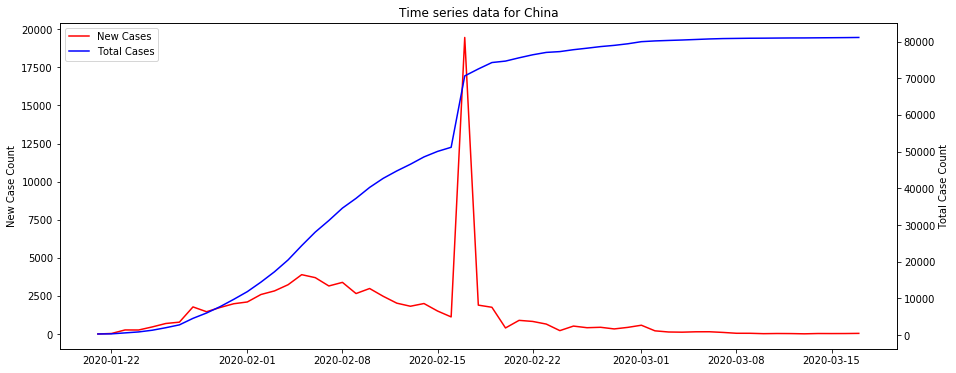

In [6]:
from datetime import datetime
ts_china_data = china_data.copy()
date_str = ts_china_data['date']
ts_china_data['date']=pd.to_datetime(ts_china_data['date'])
ts_china_data.set_index('date', inplace=True)

fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()

ln1 = ax1.plot(ts_china_data['new_cases'], color = 'r', label = "New Cases")
ln2 = ax2.plot(ts_china_data['total_cases'], color = 'b', label = "Total Cases")

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

ax1.set_ylabel("New Case Count")
ax2.set_ylabel("Total Case Count")
plt.title("Time series data for China")
plt.show()

In [7]:
ts_italy_data = italy_data.copy()
ts_italy_data['new_cases'] = ts_italy_data['new_cases'].astype(int)
ts_italy_data['date'] = pd.to_datetime(ts_italy_data['date'])
ts_italy_data.set_index('date', inplace=True)
ts_italy_data = ts_italy_data.loc['2020-01-31':'2020-03-16'].asfreq('D')
ts_italy_data.index

DatetimeIndex(['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16'],
              dtype='datetime64[ns]', name='date', freq='D')

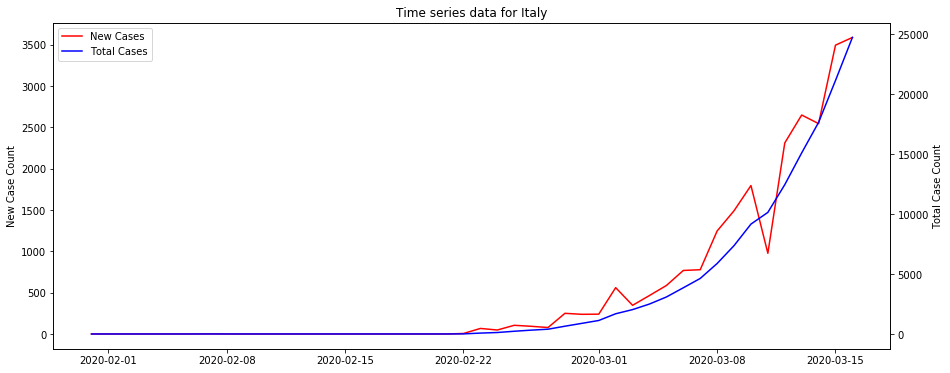

In [8]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()

ln1 = ax1.plot(ts_italy_data['new_cases'], color = 'r', label = "New Cases")
ln2 = ax2.plot(ts_italy_data['total_cases'], color = 'b', label = "Total Cases")

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

ax1.set_ylabel("New Case Count")
ax2.set_ylabel("Total Case Count")
plt.title("Time series data for Italy")
plt.show()

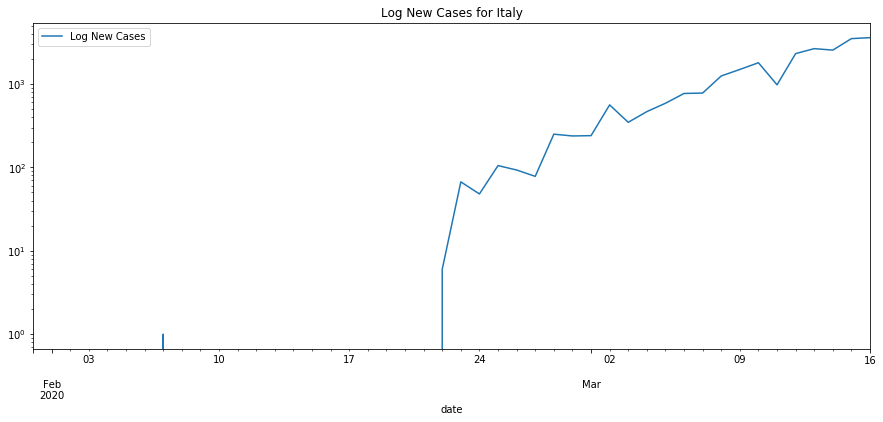

In [9]:
ts_ita = ts_italy_data['new_cases']
plt.figure(figsize=(15,6))
ts_ita.plot(logy=True, label = "Log New Cases")
plt.legend()
plt.title("Log New Cases for Italy")
plt.show()

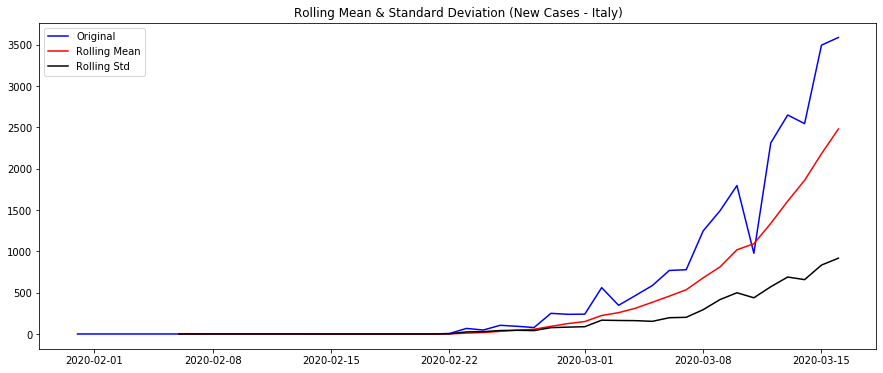

In [10]:
rolmean = ts_ita.rolling(7).mean()
rolstd = ts_ita.rolling(7).std()
plt.figure(figsize=(15,6))
plt.plot(ts_ita, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (New Cases - Italy)')
plt.show()

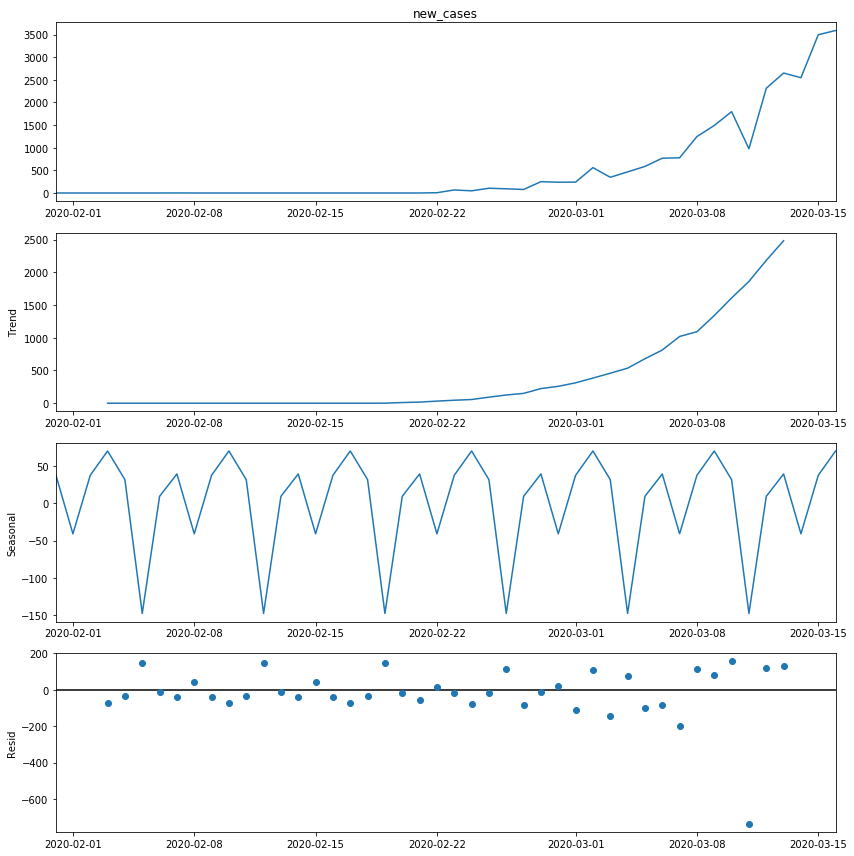

In [11]:
import itertools
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12

decomposition = sm.tsa.seasonal_decompose(ts_ita, model='additive')
fig = decomposition.plot()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_ita, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.932369
p-value                         0.777126
#Lags Used                      8.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [13]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

ts_ita = ts_ita

sel = ar_select_order(ts_ita, 14, glob=True)
sel.ar_lags
res_ar = sel.model.fit()
res_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              new_cases   No. Observations:                   46
Model:             Restr. AutoReg(13)   Log Likelihood                -201.557
Method:               Conditional MLE   S.D. of innovations            108.728
Date:                Fri, 20 Mar 2020   AIC                              9.863
Time:                        01:03:29   BIC                             10.225
Sample:                    02-13-2020   HQIC                             9.985
                         - 03-16-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        22.9026     26.742      0.856      0.392     -29.512      75.317
new_cases.L4      1.2847      0.149      8.627      0.000       0.993       1.577
new_cases.L5      0.8721      0.148      5.909      0.000       0.583       1.161
new_cases.L6      1.0754      0.227      4.730      0.000       0.630       1.521
new_cases.L11    -1.1947      0.456     -2.622      0.009      -2.088      -0.301
new_cases.L12    -4.6143      0.564     -8.184      0.000      -5.719      -3.509
new_cases.L13     2.2101      0.585      3.781      0.000       1.064       3.356
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.8383           -0.1604j            0.8535           -0.4699
AR.2            -0.8383           +0.1604j            0.8535            0.4699
AR.3            -0.6512           -0.6176j            0.8975           -0.3792
AR.4            -0.6512           +0.6176j            0.8975            0.3792
AR.5            -0.2490           -0.8348j            0.8711           -0.2961
AR.6            -0.2490           +0.8348j            0.8711            0.2961
AR.7             0.1727           -0.7929j            0.8115           -0.2159
AR.8             0.1727           +0.7929j            0.8115            0.2159
AR.9             0.5831           -0.7342j            0.9376           -0.1432
AR.10            0.5831           +0.7342j            0.9376            0.1432
AR.11            0.8685           -0.0609j            0.8706           -0.0112
AR.12            0.8685           +0.0609j            0.8706            0.0112
AR.13            2.3163           -0.0000j            2.3163           -0.0000
------------------------------------------------------------------------------
"""

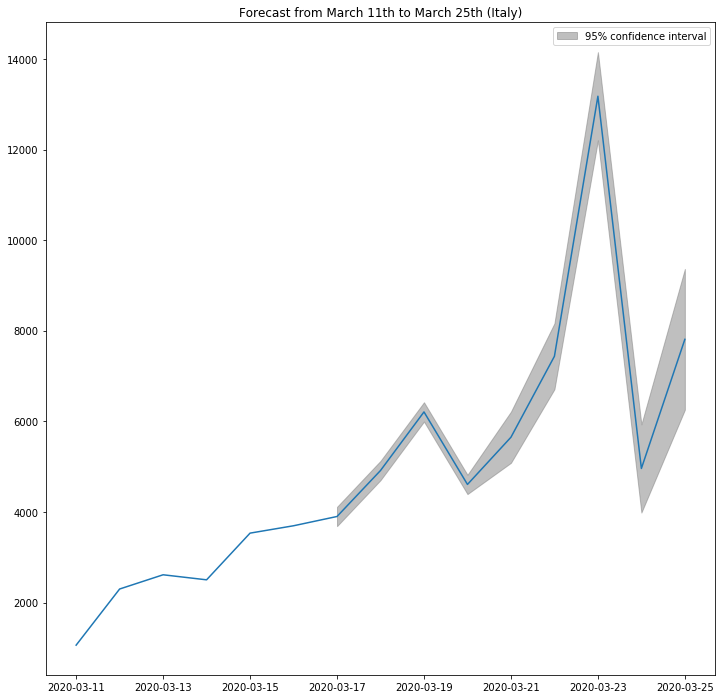

In [14]:
fig = res_ar.plot_predict(40, 54)
plt.title("Forecast from March 11th to March 25th (Italy)")
plt.show()

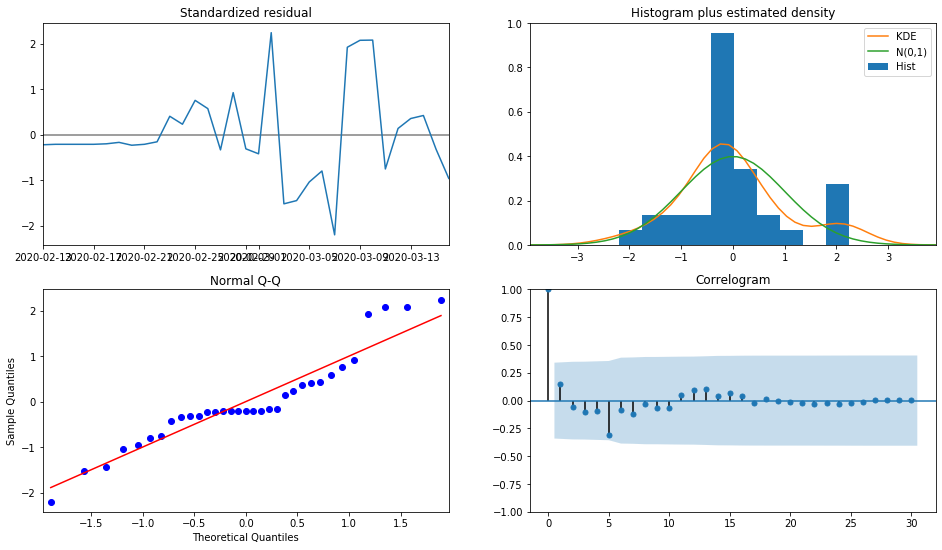

In [15]:
fig = plt.figure(figsize=(16,9))
fig = res_ar.plot_diagnostics(fig=fig, lags=30)

In [16]:
fcast = res_ar.predict(start=40, end=54)
round(fcast).astype(int)

2020-03-11     1059
2020-03-12     2298
2020-03-13     2612
2020-03-14     2501
2020-03-15     3532
2020-03-16     3694
2020-03-17     3899
2020-03-18     4914
2020-03-19     6208
2020-03-20     4607
2020-03-21     5649
2020-03-22     7436
2020-03-23    13177
2020-03-24     4959
2020-03-25     7810
Freq: D, dtype: int64